In [ ]:
#reinforcement learning buat AI game

In [ ]:
#https://medium.com/swlh/how-is-spotifys-thriving-recommendation-system-becoming-a-new-advertising-platform-a2b97ffe2012

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sln
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
sln.__version__

'0.23.1'

In [8]:
x = np.array([5,15,25,35,45,55]).reshape((-1, 1))
y = np.array([5,20,14,32,22,38])

print(x) #1 fitur
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [11]:
# f(x) = w1x1 -> 1 fitur
#f(x) = w1x1 + w2x2 -> 2 fitur
print(np.array([[5,10], [15,20], [25,30]])) #x input
print(np.array([5,20,14])) # y target

[[ 5 10]
 [15 20]
 [25 30]]
[ 5 20 14]


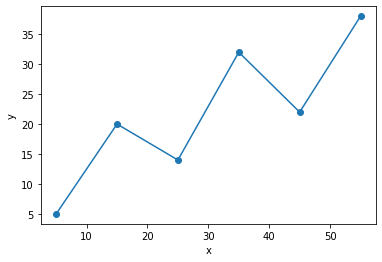

In [9]:
plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
w1 #bobot atau paramater
#hyperparameter yg kita definisikan dlu

In [12]:
#define model
model = LinearRegression()

In [13]:
model

LinearRegression()

In [14]:
#train linear regression model
model.fit(x,y)

LinearRegression()

In [15]:
model.coef_, model.intercept_

(array([0.54]), 5.633333333333329)

In [16]:
lr_score = model.score(x, y)
print('R-squared:', lr_score)

R-squared: 0.715875613747954


In [17]:
y_hat = model.predict(x)
print('prediction:', y_hat)

prediction: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


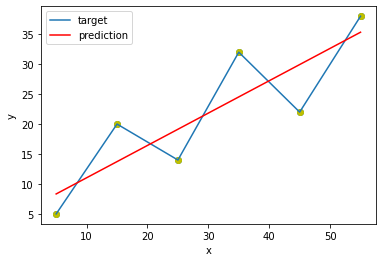

In [18]:
plt.plot(x,y, label='target')
plt.scatter(x,y)

plt.plot(x, y_hat, label='prediction', c='r')
plt.scatter(x,y, c='y')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
print(model.coef_, model.intercept_)
# y_hat = w1x1 + wo = model.coef_*x + model.intercept_
# y_hat = bias + weight*x

[0.54] 5.633333333333329


In [19]:
# input 0
model.predict([[0]])

array([5.63333333])

## Multiple Linear Regression

In [22]:
x = np.array([
    [0,1],
    [5,1],
    [15,2],
    [25,5],
    [35,11],
    [45,15],
    [55,34],
    [60, 35]
])
y = [4,5,20,14,32,22,38,43]

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[4, 5, 20, 14, 32, 22, 38, 43]


In [23]:
#define and fit model
model = LinearRegression().fit(x,y)

In [24]:
#evaluate model
r_sq=model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [25]:
#predict model
y_pred = model.predict(x)
print('prediction:', y_pred)

prediction: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


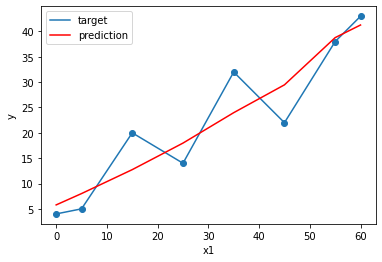

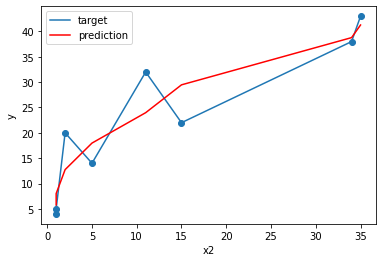

In [27]:
#plot
plt.plot(x[:,0], y, label='target')
plt.plot(x[:, 0], y_pred, label='prediction', c='r')
plt.scatter(x[:,0], y)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x[:,1], y, label='target')
plt.plot(x[:, 1], y_pred, label='prediction', c='r')
plt.scatter(x[:,1], y)

plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [29]:
model.predict([[0,1]]), model.predict([[1,0]])

(array([5.77760476]), array([5.96964892]))

## Polynomial Regression

In [31]:
x = np.array([5,15,25,35,45,55])
y = np.array([15,11,2,8,25,32])

print(x)
print(y)

[ 5 15 25 35 45 55]
[15 11  2  8 25 32]


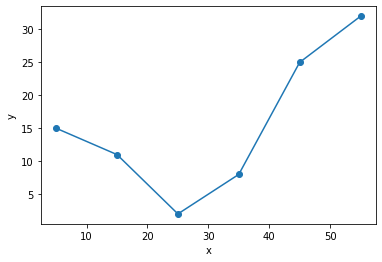

In [33]:
plt.plot(x,y)
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
polynom = PolynomialFeatures(degree=2, include_bias=False)
polynom

PolynomialFeatures(include_bias=False)

In [37]:
polynom.fit(x.reshape(-1,1))

PolynomialFeatures(include_bias=False)

In [38]:
poly_X = polynom.transform(x.reshape(-1,1))

In [39]:
print(x.reshape(-1,1))
print(poly_X)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


r2 score: 0.8908516262498564
coef: [-1.32357143  0.02839286]
intercept: 21.372321428571425


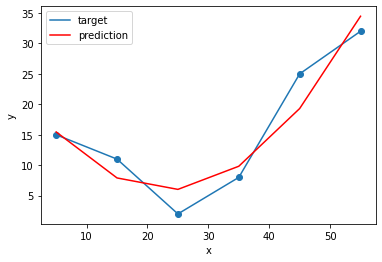

In [42]:
model = LinearRegression()
model.fit(poly_X,y)

r2 = model.score(poly_X, y)
print('r2 score:', r2)
print('coef:', model.coef_)
print('intercept:', model.intercept_)

y_pred = model.predict(poly_X)

plt.plot(x,y, label='target')
plt.plot(x,y_pred, label='prediction', c='r')
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## advanced linear regression with statsmodels

In [44]:
x = np.array([
    [0,1],
    [5,1],
    [15,2],
    [25,5],
    [35,11],
    [45,15],
    [55,34],
    [60, 35]
])
y = [4,5,20,14,32,22,38,43]

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[4, 5, 20, 14, 32, 22, 38, 43]


In [45]:
x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[4, 5, 20, 14, 32, 22, 38, 43]


In [46]:
model = sm.OLS(y, x)

In [47]:
model

In [48]:
results = model.fit()

In [49]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 27 Oct 2020   Prob (F-statistic):            0.00713
Time:                        21:44:57   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
data = load_boston()
type(data)

sklearn.utils.Bunch

In [57]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

display(df.head())
display(target.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [58]:
lr = LinearRegression()
lr.fit(df, target)

LinearRegression()

In [60]:
predictions = lr.predict(df)
target['prediction'] = predictions

display(target.head(10))

print('r2 score:', lr.score(df, target['MEDV']))

,MEDV,prediction
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
5,28.7,25.256284
6,22.9,23.001808
7,27.1,19.535988
8,16.5,11.523637
9,18.9,18.920262


r2 score: 0.7406426641094095
